In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=0)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


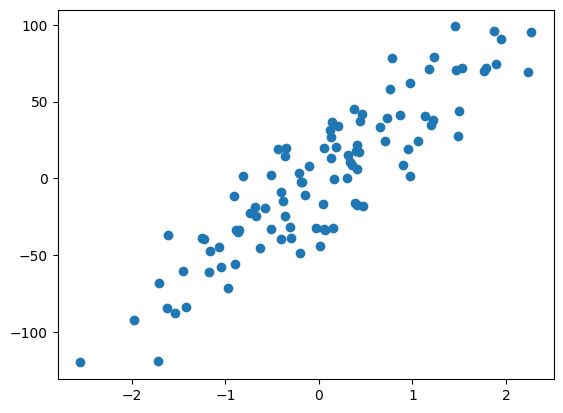

In [3]:
plt.scatter(x,y)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
print(lr.coef_)
print(lr.intercept_)

[42.85335573]
-1.6283636540614528


In [14]:

np.mean(cross_val_score(lr,x,y,cv=10,scoring='r2'))

np.float64(0.649565264881464)

In [23]:
y_pred=lr.predict(x_test)   
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.8082344456243871


In [17]:
class gdregressor:
    def __init__(self,learning_rate, epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
            # print(loss_slope,self.b)
        print(self.m,self.b)
    def predict(self,x):
        return self.m*x+self.b


In [24]:
gd=gdregressor(0.001,10000)
gd.fit(x_train,y_train)

42.93978588058746 -2.1387251734657236


In [25]:
gd.predict(x_test)

array([[-48.11661347],
       [ 36.54257129],
       [ 95.32405238],
       [-10.94817709],
       [  5.47991538],
       [-55.93348969],
       [-20.94954188],
       [ 34.97998011],
       [-24.07258841],
       [-17.57786094],
       [ 60.30746783],
       [-40.58986757],
       [ 62.01671032],
       [ 14.09949245],
       [-55.1618815 ],
       [-40.26005508],
       [  3.3997734 ],
       [ 38.65786804],
       [-68.10470012],
       [-26.99440584]])

In [26]:

y_pred=gd.predict(x_test)   
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.8082344456243871
